<a href="https://colab.research.google.com/github/byeori-jang/Deep-learning/blob/main/%082025-10-28/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [12]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [13]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [14]:
# 4. Train/Test 분리 (80:20)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

In [24]:
# 5. RNN 모델
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# 6. LSTM 모델
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

In [26]:
# 7. 모델 학습
print("🔹 Training SimpleRNN...")
rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

🔹 Training SimpleRNN...


In [27]:
print("🔹 Training LSTM...")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

🔹 Training LSTM...


In [31]:
# 8. evaluate() — 모델 내부 손실 계산
rnn_eval = rnn_model.evaluate(X_test, y_test, verbose=0)
lstm_eval = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"📉 RNN evaluate() loss:  {rnn_eval:.6f}")
print(f"📉 LSTM evaluate() loss: {lstm_eval:.6f}")

📉 RNN evaluate() loss:  0.004679
📉 LSTM evaluate() loss: 0.014272


In [32]:
# 9. 예측
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [33]:
# 10. MSE 계산
rnn_mse = mean_squared_error(y_test, rnn_pred)
lstm_mse = mean_squared_error(y_test, lstm_pred)
print(f"📊 RNN Test MSE:  {rnn_mse:.6f}")
print(f"📊 LSTM Test MSE: {lstm_mse:.6f}")

📊 RNN Test MSE:  0.004679
📊 LSTM Test MSE: 0.014272


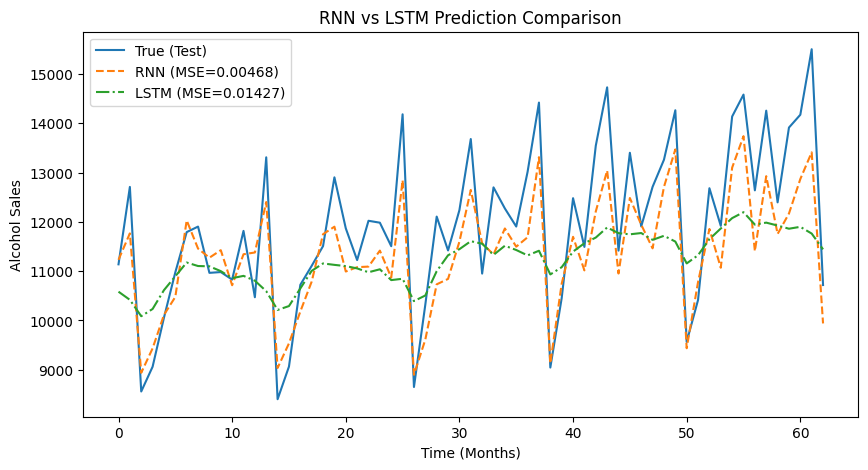

In [34]:
# 11. 시각화
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(y_test), label='True (Test)')
plt.plot(scaler.inverse_transform(rnn_pred), label=f'RNN (MSE={rnn_mse:.5f})', linestyle='--')
plt.plot(scaler.inverse_transform(lstm_pred), label=f'LSTM (MSE={lstm_mse:.5f})', linestyle='-.')
plt.legend()
plt.title("RNN vs LSTM Prediction Comparison")
plt.xlabel("Time (Months)")
plt.ylabel("Alcohol Sales")
plt.show()